In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('/content/spam.csv',encoding="latin-1")
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [7]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isnull().sum()

,0
target,0
text,0


In [10]:
df.duplicated().sum()

403

In [11]:
df.drop_duplicates(inplace= True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

## EDA Part

In [14]:
df['target'].value_counts()

,count
target,
0,4516
1,653


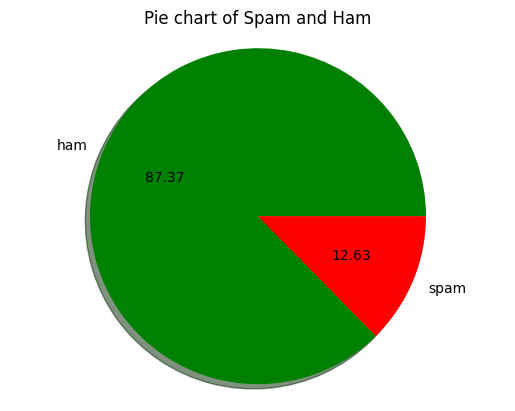

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],colors=['green','red'],shadow=True,startangle=0,autopct='%0.2f')
plt.axis('equal')
plt.title('Pie chart of Spam and Ham')
plt.show()

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
df['num_char'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_char', ylabel='Count'>

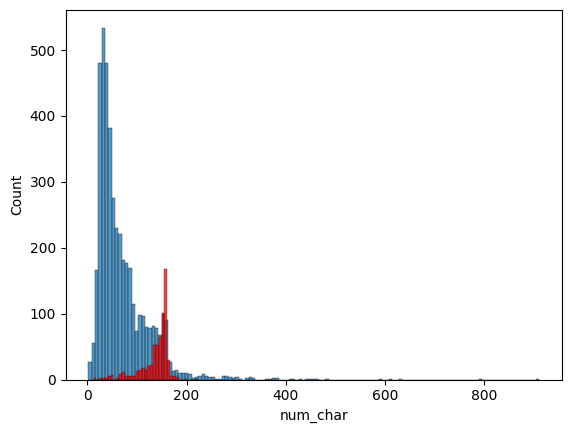

In [19]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

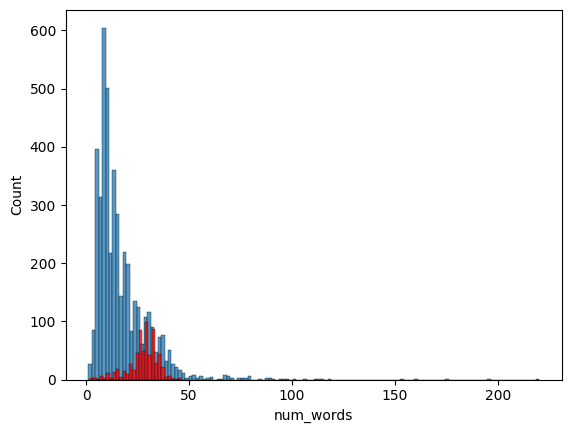

In [20]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

In [21]:
dff = df.drop(columns=['text'])
dff.head()


,target,num_char,num_words,num_sent
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [22]:
dff.corr()

,target,num_char,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


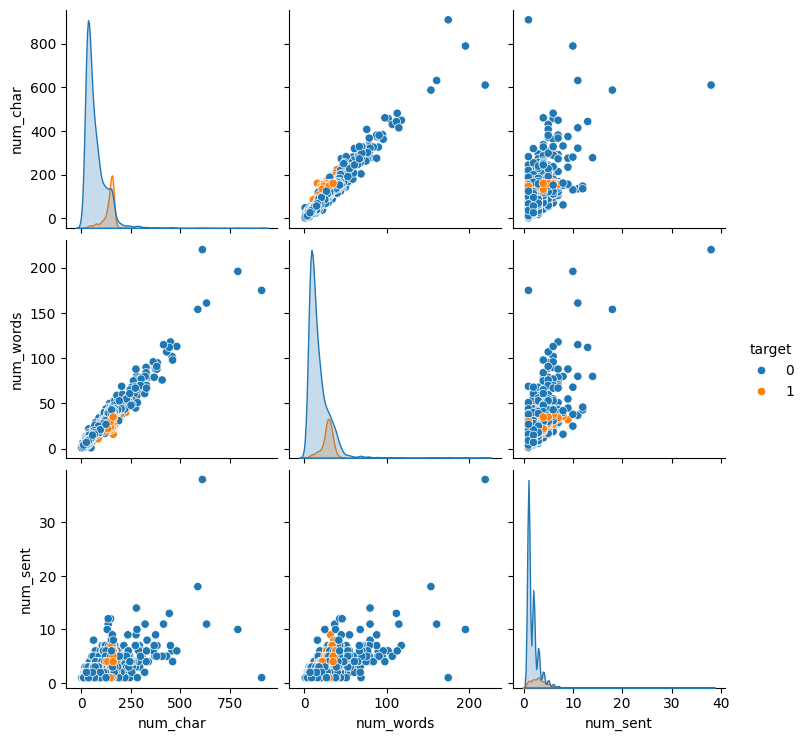

In [23]:
sns.pairplot(df,hue="target")

<Axes: >

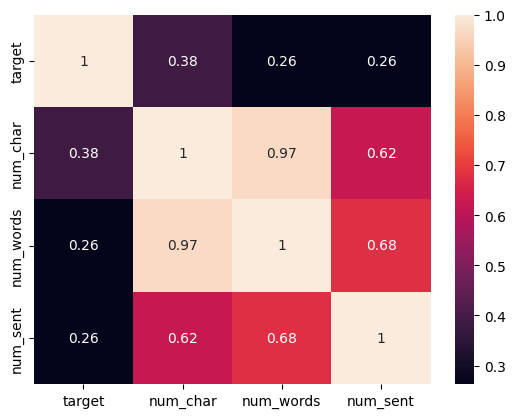

In [24]:
sns.heatmap(dff.corr(),annot=True)

## Data Preprocessing or amdr khetre text preprocess er 5 ta dhap
1. lowercase
2. tokenization
3. removing special characters
4. removing stop words and punctuation
5. stemming


In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [28]:
def preprocess(text):
  y = []
  text = text.lower()
  text = nltk.word_tokenize(text)
  for i in text:
    if i.isalnum():
      if i not in stopwords.words("english") and i not in string.punctuation:
        y.append(ps.stem(i))
  return " ".join(y)

In [29]:
df['text_trans']= df['text'].apply(preprocess)
df.head()

,target,text,num_char,num_words,num_sent,text_trans
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


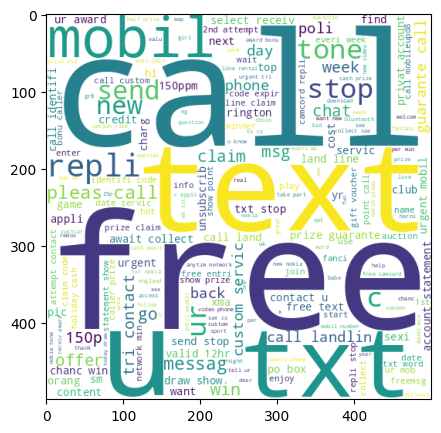

In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=5,background_color="white")
spam_wc = wc.generate(df[df['target']==1]['text_trans'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)

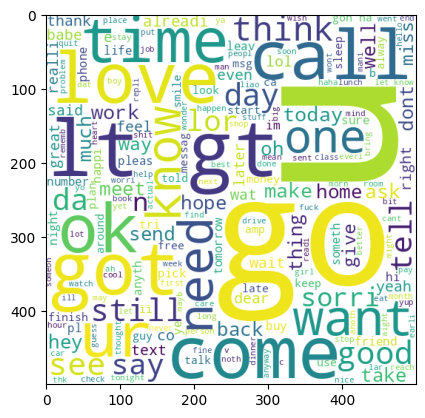

In [31]:
ham_wc = wc.generate(df[df['target']==0]['text_trans'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [32]:
spams = []
for msg in df[df['target']==1]['text_trans'].tolist():
  for i in msg.split():
    spams.append(i)




In [33]:
from collections import Counter
Counter(spams).most_common(20)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57)]

In [34]:
pd.DataFrame(Counter(spams).most_common(50)).head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


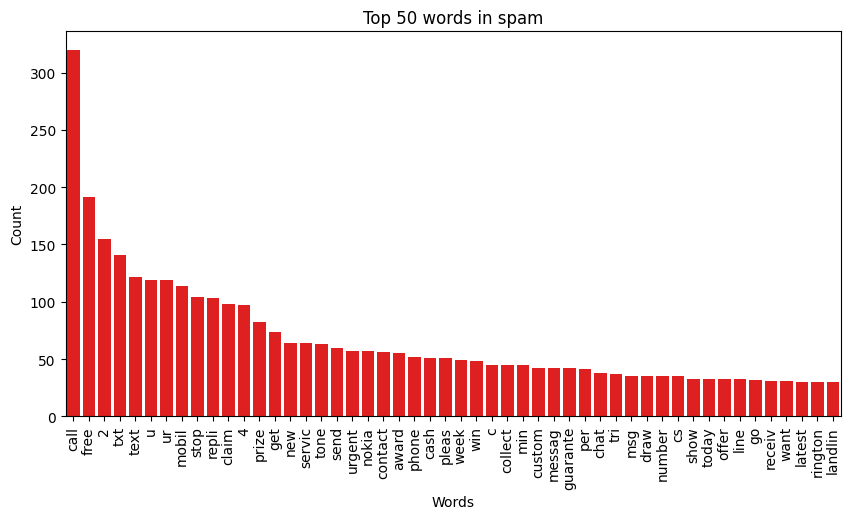

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x=pd.DataFrame(Counter(spams).most_common(50))[0],y=pd.DataFrame(Counter(spams).most_common(50))[1],color='red')
plt.title('Top 50 words in spam')
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

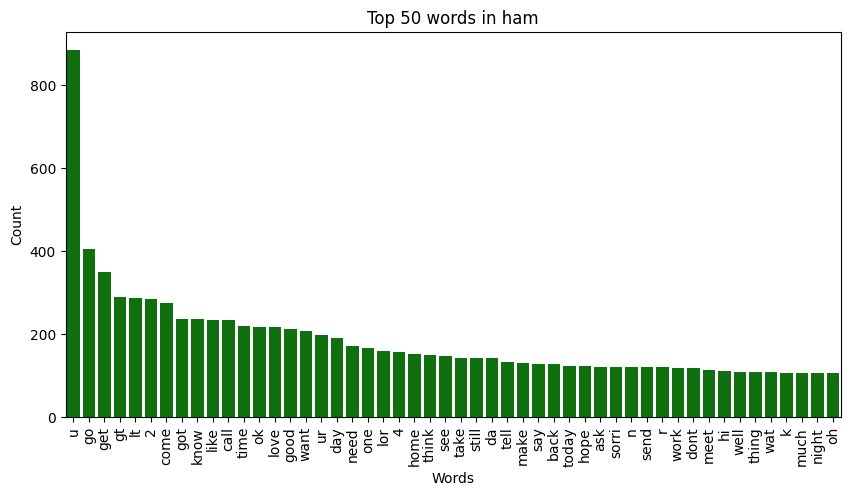

In [36]:
hams = []
for msg in df[df['target']==0]['text_trans'].tolist():
  for i in msg.split():
    hams.append(i)

plt.figure(figsize=(10,5))
sns.barplot(x=pd.DataFrame(Counter(hams).most_common(50))[0],y=pd.DataFrame(Counter(hams).most_common(50))[1],color='green')
plt.title('Top 50 words in ham')
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()


# Model Building

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()
x= tfidf.fit_transform(df['text_trans']).toarray()
print(x,"\n")
y = df['target'].values
print(y)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

[0 0 1 ... 0 0 0]


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)
#appending num col to x
#x = np.hstack(x,df['num_char'].values.reshape(-1,1))

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [39]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb= GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [40]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [41]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [42]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [43]:
# tfidf --> MNB

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [45]:
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [46]:
clfs = {
    'SVC' : svc,
    'MNB' : mnb,
    'KN' : knc,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb

}

In [47]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy,precision

In [48]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [49]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
  print(f"{name} accuracy is {current_accuracy}")
  print(f"{name} precision is {current_precision}")
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

SVC accuracy is 0.9758220502901354
SVC precision is 0.9747899159663865
MNB accuracy is 0.9709864603481625
MNB precision is 1.0
KN accuracy is 0.9052224371373307
KN precision is 1.0
DT accuracy is 0.9294003868471954
DT precision is 0.8282828282828283
LR accuracy is 0.9584139264990329
LR precision is 0.9702970297029703
RF accuracy is 0.9758220502901354
RF precision is 0.9829059829059829
AdaBoost accuracy is 0.960348162475822
AdaBoost precision is 0.9292035398230089
BgC accuracy is 0.9584139264990329
BgC precision is 0.8682170542635659
ETC accuracy is 0.9748549323017408
ETC precision is 0.9745762711864406
GBDT accuracy is 0.9468085106382979
GBDT precision is 0.9191919191919192
xgb accuracy is 0.9671179883945842
xgb precision is 0.9262295081967213


In [50]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [51]:
performance_df.head()

,Algorithm,Accuracy,Precision
1,MNB,0.970986,1.000000
2,KN,0.905222,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576


In [52]:
performance_df1 = pd.melt(performance_df,id_vars='Algorithm')
performance_df1.head()


,Algorithm,variable,value
0,MNB,Accuracy,0.970986
1,KN,Accuracy,0.905222
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855


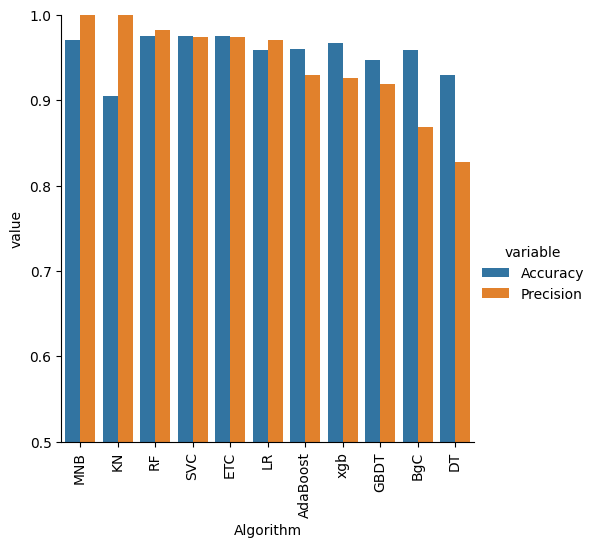

In [53]:
sns.catplot(x='Algorithm',y='value',hue='variable',kind='bar',data=performance_df1,height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
# Model improve
#upore countervectorizer na kore tfidf korle valo score dey ar tar sathe feature scaling o number col add kore dekhsilam temon valo score ashe na
#tai comment out korsi

In [59]:
#Voting Classifier
#mane best performed algo miliye banano algo
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')


In [60]:
voting.fit(x_train,y_train)
y_pred = voting.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [61]:
#applying stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()
from sklearn.ensemble import StackingClassifier

In [62]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9796905222437138
[[888   8]
 [ 13 125]]
0.9398496240601504


In [64]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [65]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))